# Classification Model Selection

## Goal

Apply and compare different classification models to find the best-performing model based on the best performance score. The following classification techniques will be explored:

- **Logistic Regression**
- **K-Nearest Neighbors (K-NN)**
- **Support Vector Machine (SVM)**
- **Kernel SVM**
- **Naive Bayes**
- **Decision Tree Classification**
- **Random Forest Classification**

Each model will be trained on the dataset, evaluated using cross-validation, and the best model will be selected based on its performance score.

## Model Performance Metrics

### Confusion Matrix

| **Actual / Prediction** | **Negative**          | **Positive**           |
|--------------------------|------------------|-------------------|
| **Negative**                 | **True Negative**     | **False Positive** ⚠️ (Type I Error) |
| **Positive**                 | **False Negative** ⚠️ (Type II Error) | **True Positive**      |


### Accuracy Score

How often the classifier **correctly** predicts.

$$
Accuracy Score = \frac {True Negative + True Positive}  {True Negative + True Positive + False Negative + False Positive}
$$

### Error Score

How often the classifier **uncorrectly** predicts.

$$
Error Score = \frac {False Negative + False Positive}  {True Negative + True Positive + False Negative + False Positive}
$$

### Precision Score

How many of the **correctly** predicted cases actually turned out to be positive.

$$
Precision Score = \frac {True Positive}  {True Positive + False Positive}
$$

### Recall (Sensitivity) Score

How many of the actual **positive** cases the model was been able to predict.

$$
Recall Score = \frac {True Positive}  {True Positive + False Negative}
$$

### F1 Score

A combined idea about Precision and Recall metrics.

$$
F1 Score = 2 \times \frac {Precision \times Recall}  {Precision + Recall}
$$

### ROC-AUC (Area Under ROC Curve)

Estimates the general ability of the model differ classes changing the threshold. The greater the AUC, the better is the performance of the model at different threshold points between positive and negative classes.

ROC-AUC example:


![](./pic/roc_auc.png)

| **Metric**       | **When to Use**                                                                 | **Recommended Values**               |
|-------------------|----------------------------------------------------------------------------------|---------------------------------------|
| **Accuracy**      | When classes are **balanced**, and FP/FN are equally important.                 | $\approx 1.0$ (closer to 1 is better). |
| **Precision**     | When minimizing **false positives (FP)** is crucial.                           | $\approx 1.0$ (if FP is critical). |
| **Recall**        | When minimizing **false negatives (FN)** is crucial.                           | $\approx 1.0$ (if FN is critical). |
| **F1-Score**      | When classes are **imbalanced** and a balance between Precision and Recall is needed. | $\approx 1.0$ (if both FP and FN are important). |
| **ROC-AUC**       | To evaluate the **model's ability to distinguish between classes** across thresholds. | $\approx 1.0$, but not below 0.7. |
| **Error Rate**    | To measure the **overall proportion of incorrect predictions** made by the model. | $\approx 0.0$ (closer to 0 is better). |


## Dataset

Have a quick look at the dataset.

In [1]:
%cat ../00_data/Data.csv | head

Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
1017122,8,10,10,8,7,10,9,7,1,4
1018099,1,1,1,1,2,10,3,1,1,2
1018561,2,1,2,1,2,1,3,1,1,2
1033078,2,1,1,1,2,1,1,1,5,2


In [2]:
%cat ../00_data/Data.csv | tail

654546,1,1,1,1,2,1,1,1,8,2
654546,1,1,1,3,2,1,1,1,1,2
695091,5,10,10,5,4,5,4,4,1,4
714039,3,1,1,1,2,1,1,1,1,2
763235,3,1,1,1,2,1,2,1,2,2
776715,3,1,1,1,3,2,1,1,1,2
841769,2,1,1,1,2,1,1,1,1,2
888820,5,10,10,3,7,3,8,10,2,4
897471,4,8,6,4,3,4,10,6,1,4
897471,4,8,8,5,4,5,10,4,1,4

## Load the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [4]:
df = pd.read_csv('../00_data/Data.csv', sep=',')

df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Data Preprocessing

In [5]:
df.shape

(683, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [7]:
np.sum(df.isna(), axis=0)

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

## Target Variable and Features

+ Target variable:
    + `Class`
        + **2** - benign
        + **4** - malignant
+ Features:
    + `Clump Thickness`
    + `Uniformity of Cell Size`
    + `Uniformity of Cell Shape`
    + `Marginal Adhesion`
    + `Single Epithelial Cell Size`
    + `Bare Nuclei`
    + `Bland Chromatin`
    + `Normal Nucleoli`
    + `Mitoses`
    

In [8]:
X = df.drop(['Sample code number', 'Class'], axis=1)
y = df['Class'].values

In [9]:
X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [10]:
y[:5]

array([2, 2, 2, 2, 2])

## Splitting the dataset into the Training set and Test set

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=444)

## Classification models

In [12]:
# metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [13]:
def ROC_AUC_plot(y_true, y_score):
    # Compute ROC curve and AUC
    roc_auc = roc_auc_score(y_test, y_scores)
    fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label=4)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guessing')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

In [14]:
def model_score(model, name, y_true, y_pred, y_scores):
    # evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    error = 1 - accuracy
    precision = precision_score(y_test, y_pred, pos_label=4)
    recall = recall_score(y_test, y_pred, pos_label=4)
    f1 = f1_score(y_test, y_pred, pos_label=4)
    roc_auc = roc_auc_score(y_test, y_scores)
    
    print(f'-- {name} --')
    print(f"Accuracy Score = {accuracy:.4f}")
    print(f"Error Score = {error:.4f}")
    print(f"Precision Score = {precision:.4f}")
    print(f"Recall Score = {recall:.4f}")
    print(f"F1-Score = {f1:.4f}")
    print(f"ROC-AUC Score = {roc_auc:.4f}")
    

### Logistic Regression

-- Logistic Regression --
Accuracy Score = 0.9562
Error Score = 0.0438
Precision Score = 0.9130
Recall Score = 0.9545
F1-Score = 0.9333
ROC-AUC Score = 0.9880


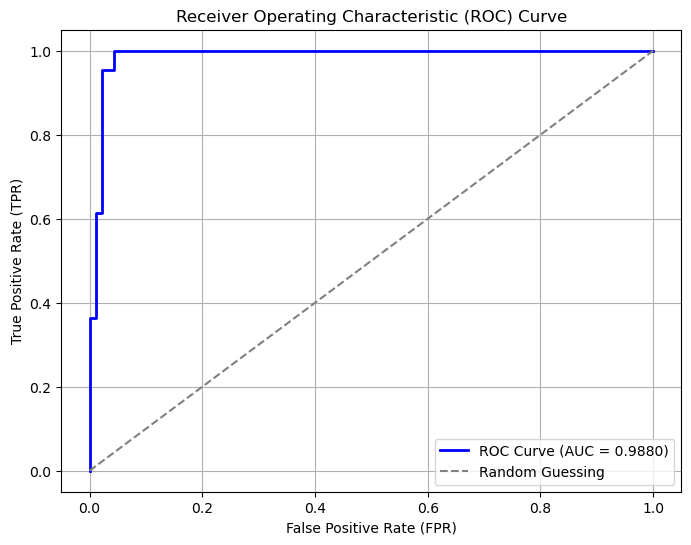

In [15]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline(
    steps =[
        ('scale', StandardScaler()),
        ('logit', LogisticRegression())
    ]
)

# train the model
pipeline.fit(X_train, y_train)

# test the model
y_pred = pipeline.predict(X_test)

# Predict probabilities for the positive class
y_scores = pipeline.predict_proba(X_test)[:, 1]

model_score(pipeline, 'Logistic Regression', y_test, y_pred, y_scores)

# plot the ROC-AUC
ROC_AUC_plot(y_test, y_scores)


### K-Nearest Neighbors (K-NN)

-- KNN --
Accuracy Score = 0.9635
Error Score = 0.0365
Precision Score = 0.9333
Recall Score = 0.9545
F1-Score = 0.9438
ROC-AUC Score = 0.9842


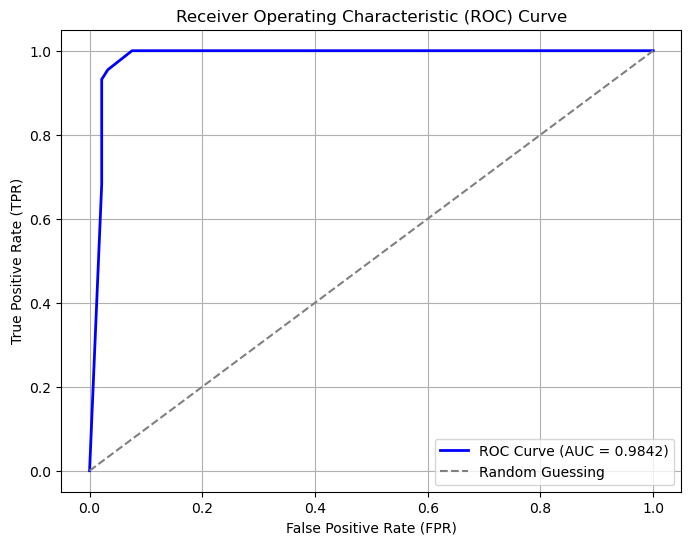

In [16]:
from sklearn.neighbors import KNeighborsClassifier

pipeline = Pipeline(
    steps =[
        ('scale', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2))
    ]
)

# train the model
pipeline.fit(X_train, y_train)

# test the model
y_pred = pipeline.predict(X_test)

# Predict probabilities for the positive class
y_scores = pipeline.predict_proba(X_test)[:, 1]

model_score(pipeline, 'KNN', y_test, y_pred, y_scores)

ROC_AUC_plot(y_test, y_scores)

### Support Vector Machine

### Linear kernel

-- SVM (Linear Kernel) --
Accuracy Score = 0.9416
Error Score = 0.0584
Precision Score = 0.8750
Recall Score = 0.9545
F1-Score = 0.9130
ROC-AUC Score = 0.9858


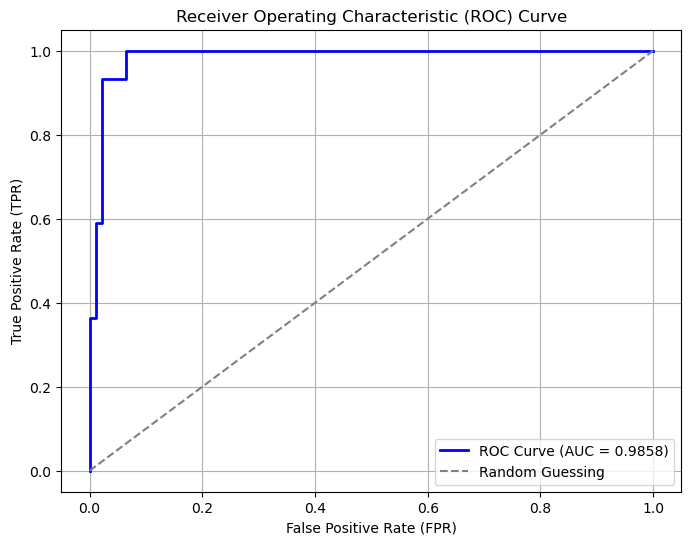

In [17]:
from sklearn.svm import SVC

pipeline = Pipeline(
    steps =[
        ('scale', StandardScaler()),
        ('svm', SVC(kernel='linear', probability=True, random_state=0))
    ]
)

# train the model
pipeline.fit(X_train, y_train)

# test the model
y_pred = pipeline.predict(X_test)

# Predict probabilities for the positive class
y_scores = pipeline.predict_proba(X_test)[:, 1]

model_score(pipeline, 'SVM (Linear Kernel)', y_test, y_pred, y_scores)

ROC_AUC_plot(y_test, y_scores)

### Non-Linear kernel

-- SVM (Non-Linear Kernel) --
Accuracy Score = 0.9416
Error Score = 0.0584
Precision Score = 0.8600
Recall Score = 0.9773
F1-Score = 0.9149
ROC-AUC Score = 0.9792


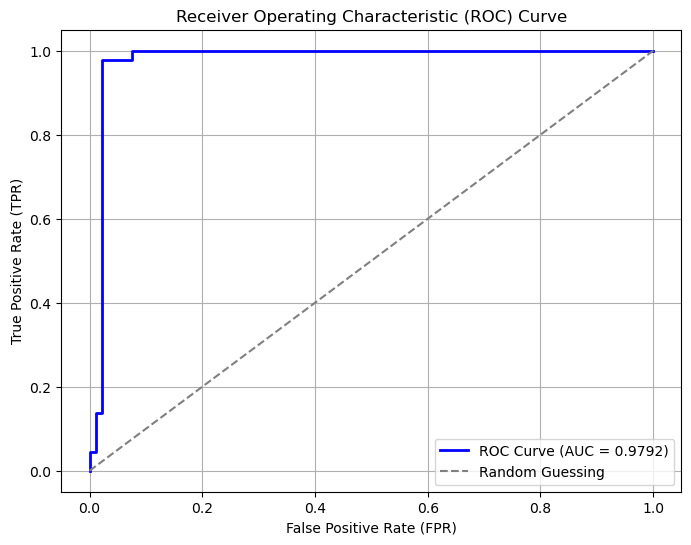

In [18]:
from sklearn.svm import SVC

pipeline = Pipeline(
    steps =[
        ('scale', StandardScaler()),
        ('svm', SVC(kernel='rbf', probability=True, random_state=0))
    ]
)

# train the model
pipeline.fit(X_train, y_train)

# test the model
y_pred = pipeline.predict(X_test)

# Predict probabilities for the positive class
y_scores = pipeline.predict_proba(X_test)[:, 1]

model_score(pipeline, 'SVM (Non-Linear Kernel)', y_test, y_pred, y_scores)

ROC_AUC_plot(y_test, y_scores)

### Polynomial kernel

-- SVM (Poly Kernel) --
Accuracy Score = 0.9343
Error Score = 0.0657
Precision Score = 0.9487
Recall Score = 0.8409
F1-Score = 0.8916
ROC-AUC Score = 0.9936


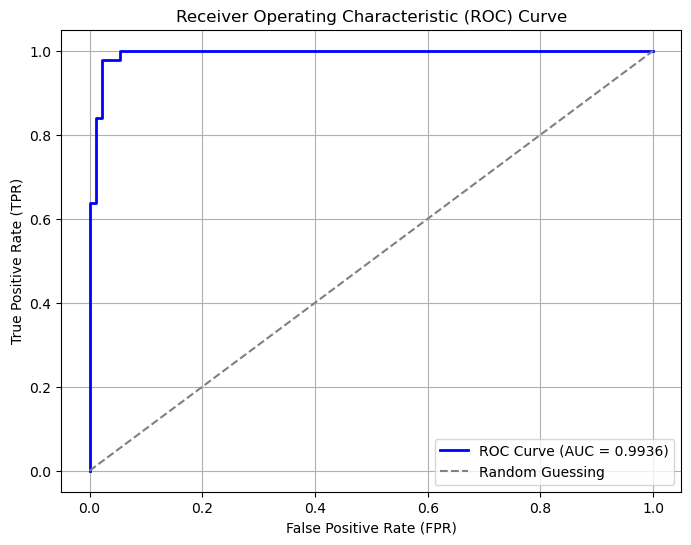

In [19]:
from sklearn.svm import SVC

pipeline = Pipeline(
    steps =[
        ('scale', StandardScaler()),
        ('svm', SVC(kernel='poly', degree=3, probability=True, random_state=0))
    ]
)

# train the model
pipeline.fit(X_train, y_train)

# test the model
y_pred = pipeline.predict(X_test)

# Predict probabilities for the positive class
y_scores = pipeline.predict_proba(X_test)[:, 1]

model_score(pipeline, 'SVM (Poly Kernel)', y_test, y_pred, y_scores)

ROC_AUC_plot(y_test, y_scores)

### Naive Bayes

-- Naive Bayes --
Accuracy Score = 0.9270
Error Score = 0.0730
Precision Score = 0.8148
Recall Score = 1.0000
F1-Score = 0.8980
ROC-AUC Score = 0.9637


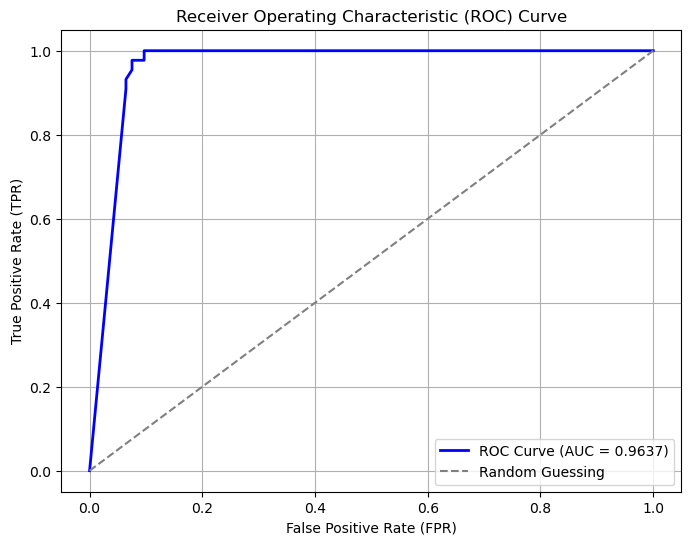

In [20]:
from sklearn.naive_bayes import GaussianNB

pipeline = Pipeline(
    steps =[
        ('nb', GaussianNB())
    ]
)

# train the model
pipeline.fit(X_train, y_train)

# test the model
y_pred = pipeline.predict(X_test)

# Predict probabilities for the positive class
y_scores = pipeline.predict_proba(X_test)[:, 1]

model_score(pipeline, 'Naive Bayes', y_test, y_pred, y_scores)

ROC_AUC_plot(y_test, y_scores)

### Decision Tree

-- Decision Tree --
Accuracy Score = 0.8905
Error Score = 0.1095
Precision Score = 0.8537
Recall Score = 0.7955
F1-Score = 0.8235
ROC-AUC Score = 0.8655


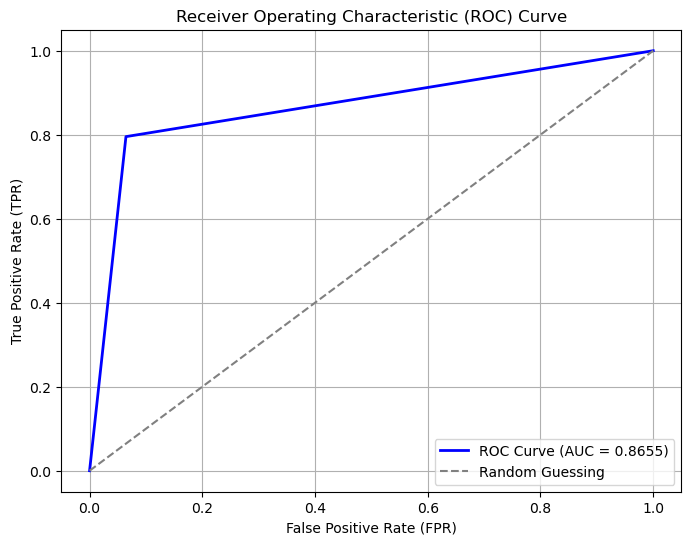

In [21]:
from sklearn.tree import DecisionTreeClassifier

pipeline = Pipeline(
    steps =[
        ('tree', DecisionTreeClassifier(criterion='entropy', random_state=0))
    ]
)

# train the model
pipeline.fit(X_train, y_train)

# test the model
y_pred = pipeline.predict(X_test)

# Predict probabilities for the positive class
y_scores = pipeline.predict_proba(X_test)[:, 1]

model_score(pipeline, 'Decision Tree', y_test, y_pred, y_scores)

ROC_AUC_plot(y_test, y_scores)

### Random Forest Regression

-- Random Forest --
Accuracy Score = 0.9635
Error Score = 0.0365
Precision Score = 0.9333
Recall Score = 0.9545
F1-Score = 0.9438
ROC-AUC Score = 0.9820


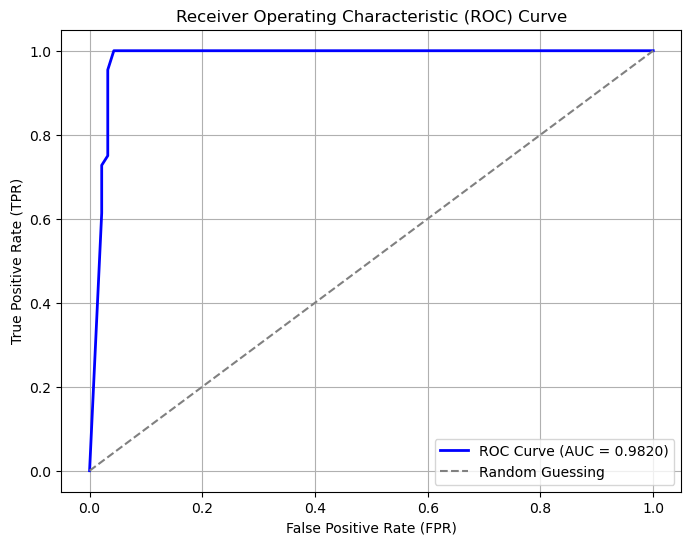

In [22]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(
    steps =[
        ('rf', RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0))
    ]
)

# train the model
pipeline.fit(X_train, y_train)

# test the model
y_pred = pipeline.predict(X_test)

# Predict probabilities for the positive class
y_scores = pipeline.predict_proba(X_test)[:, 1]

model_score(pipeline, 'Random Forest', y_test, y_pred, y_scores)

ROC_AUC_plot(y_test, y_scores)

## Model Selection

In [23]:
# classes balance in the training set
pd.Series(y_train).value_counts()

2    351
4    195
Name: count, dtype: int64

In [24]:
# classes balance in the test set
pd.Series(y_test).value_counts()

2    93
4    44
Name: count, dtype: int64

For breast cancer classification, the F1-Score will be used because the classes (2 for benign and 4 for malignant) are imbalanced. The F1-Score helps maintain a balance between false positives (Precision) and false negatives (Recall), both of which can have significant consequences. Additionally, ROC-AUC will be considered to evaluate the overall performance of the model in distinguishing between the two classes.

In [25]:
from sklearn.metrics import confusion_matrix

# models configuration
models_params = {
    'Logistic Regression': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', LogisticRegression(random_state=0))
        ])
    },
    'KNN': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2))
        ])
    },
    'Support Vector Machine (linear)': {
        'model': Pipeline([
            ("scaler", StandardScaler()), 
            ("classifier", SVC(kernel='linear', probability=True, random_state=0))
        ])
    },
    'Support Vector Machine (non-linear)': {
        'model': Pipeline([
            ("scaler", StandardScaler()), 
            ("classifier", SVC(kernel='rbf', probability=True, random_state=0))
        ])
    },
    'Naive Bayes': {
        'model': Pipeline([
            ("classifier", GaussianNB())
        ])
    },
    'Decision Tree': {
        'model': Pipeline([
            ("classifier", DecisionTreeClassifier(criterion='entropy', random_state=0))
        ])
    },
    'Random Forest': {
        'model': Pipeline([
            ("classifier", RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=0))
        ])
    }
}


for model_name, model_config in models_params.items():
    model = model_config['model'].fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_scores = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label=4)
    roc_auc = roc_auc_score(y_test, y_scores)
    cm = confusion_matrix(y_test, y_pred)
    print(f" -> {model_name}\naccuracy = {accuracy:.4f}, F1-score = {f1:.4f}, ROC-AUC = {roc_auc:.4f}\n{cm}")
    
    

 -> Logistic Regression
accuracy = 0.9562, F1-score = 0.9333, ROC-AUC = 0.9880
[[89  4]
 [ 2 42]]
 -> KNN
accuracy = 0.9635, F1-score = 0.9438, ROC-AUC = 0.9842
[[90  3]
 [ 2 42]]
 -> Support Vector Machine (linear)
accuracy = 0.9416, F1-score = 0.9130, ROC-AUC = 0.9858
[[87  6]
 [ 2 42]]
 -> Support Vector Machine (non-linear)
accuracy = 0.9416, F1-score = 0.9149, ROC-AUC = 0.9792
[[86  7]
 [ 1 43]]
 -> Naive Bayes
accuracy = 0.9270, F1-score = 0.8980, ROC-AUC = 0.9637
[[83 10]
 [ 0 44]]
 -> Decision Tree
accuracy = 0.8905, F1-score = 0.8235, ROC-AUC = 0.8655
[[87  6]
 [ 9 35]]
 -> Random Forest
accuracy = 0.9708, F1-score = 0.9565, ROC-AUC = 0.9875
[[89  4]
 [ 0 44]]


### Model Selection for Breast Cancer Classification

The best choice is **Random Forest**, as it eliminates false negatives (FN = 0) and achieves a high F1-Score (0.9565) and ROC-AUC (0.9875).  
An alternative is **KNN**, which also performs well but allows 2 false negatives.  
**Logistic Regression** is a simpler and more interpretable option but has a slightly lower F1-Score.


### Experiment. Params tuning.

In [26]:
from sklearn.metrics import confusion_matrix, make_scorer
from sklearn.model_selection import KFold, GridSearchCV

random_state = 0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# models configuration
models_params = {
    'Logistic Regression': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', LogisticRegression(random_state=random_state))
        ]),
        'params': {
            'classifier__class_weight': [None, 'balanced']
        }
    },
    'KNN': {
        'model': Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', KNeighborsClassifier())
        ]),
        'params': {
            'classifier__n_neighbors': [3, 5, 7, 10],
            'classifier__metric': ['euclidean', 'manhattan']
        }
    },
    'Support Vector Machine': {
        'model': Pipeline([
            ("scaler", StandardScaler()), 
            ("classifier", SVC(probability=True, random_state=random_state))
        ]),
        'params': {
            'classifier__class_weight': [None, 'balanced'],
            #'classifier__C': [0.1, 1, 10, 100],
            'classifier__kernel': ['linear', 'rbf', 'poly'],
            #'classifier__gamma': ['scale', 'auto']
        }
    },
    'Naive Bayes': {
        'model': Pipeline([
            ("classifier", GaussianNB())
        ]),
        'params': {
            #'classifier__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
        }
    },
    'Decision Tree': {
        'model': Pipeline([
            ("classifier", DecisionTreeClassifier(random_state=random_state))
        ]),
        'params': {
            'classifier__criterion': ['gini', 'entropy'],
            #'classifier__max_depth': [None, 10, 20, 30],
            'classifier__class_weight': [None, 'balanced']
        }
    },
    'Random Forest': {
        'model': Pipeline([
            ("classifier", RandomForestClassifier(random_state=random_state))
        ]),
        'params': {
            'classifier__n_estimators': [10, 50, 100, 200],
            'classifier__criterion': ['gini', 'entropy'],
            #'classifier__max_depth': [None, 10, 20, 30],
            'classifier__class_weight': [None, 'balanced']
        }
    }
}

cv = KFold(shuffle=True, n_splits=5, random_state=random_state)

f1_scorer = make_scorer(f1_score, pos_label=4)

print('--> Best models searching...')
# searching of the best params for every model on the training set
best_models = {}
for model_name, model_config in models_params.items():
    print(f"Run grid search to find the best params for {model_name}...")
    grid_search = GridSearchCV(model_config['model'],
                               model_config['params'],
                               cv = cv,
                               scoring=f1_scorer)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"The best model for {model_name}: {grid_search.best_params_}")

print('--> Best models evaluating...')
# evaluation of every model on the testing set
test_scores = {}
for model_name, best_model in best_models.items():
    # test the model
    y_pred = best_model.predict(X_test)
    # Predict probabilities for the positive class
    y_scores = best_model.predict_proba(X_test)[:, 1]

    f1 = f1_score(y_test, y_pred, pos_label=4)
    roc_auc = roc_auc_score(y_test, y_scores)
    cm = confusion_matrix(y_test, y_pred)
    
    test_scores[model_name] = {'f1': f1, 'roc-auc': roc_auc}
    
    print(f"{model_name}: F1-score = {f1:.4f}, ROC-AUC = {roc_auc:.4f}\n{cm}")
    
    

--> Best models searching...
Run grid search to find the best params for Logistic Regression...
The best model for Logistic Regression: {'classifier__class_weight': 'balanced'}
Run grid search to find the best params for KNN...
The best model for KNN: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 10}
Run grid search to find the best params for Support Vector Machine...
The best model for Support Vector Machine: {'classifier__class_weight': None, 'classifier__kernel': 'linear'}
Run grid search to find the best params for Naive Bayes...
The best model for Naive Bayes: {}
Run grid search to find the best params for Decision Tree...
The best model for Decision Tree: {'classifier__class_weight': 'balanced', 'classifier__criterion': 'entropy'}
Run grid search to find the best params for Random Forest...
The best model for Random Forest: {'classifier__class_weight': 'balanced', 'classifier__criterion': 'gini', 'classifier__n_estimators': 100}
--> Best models evaluating...
Log